In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import statsmodels.api as sm

Membaca data CSV

In [26]:
#Load File
df_customer = pd.read_csv('/content/Case Study - Customer.csv', delimiter = ',')
df_product = pd.read_csv('/content/Case Study - Product.csv', delimiter = ';')
df_store = pd.read_csv('/content/Case Study - Store.csv', delimiter = ';')
df_transaction = pd.read_csv('/content/Case Study - Transaction.csv', delimiter = ';')

In [18]:
df_customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3
...,...,...,...,...,...
442,443,33,1,NaN,9
443,444,53,0,Married,15
444,445,51,0,Married,14
445,446,57,0,Married,7


In [21]:
df_product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [24]:
df_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [27]:
df_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [31]:
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [34]:
df_store.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [35]:
df_product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [36]:
df_product.isnull().sum()
df_transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [55]:
df_customer['Income'] = df_customer['Income'].astype('float64')


In [58]:
df_store['Latitude'] = df_store['Latitude'].astype('float64')
df_store['Longitude'] = df_store['Longitude'].astype('float64')

Menggabungkan data

In [59]:
df_merge = pd.merge(df_customer, df_transaction, on = 'CustomerID')
df_merge = pd.merge(df_merge, df_product.drop(columns = 'Price'), on = 'ProductID')
df_merge = pd.merge(df_merge, df_store, on = 'StoreID')
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.0,TR54475,23/02/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.0,TR53643,22/05/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.0,TR5151,10/03/2022,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.0,TR98635,18/06/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.0,TR9420,12/01/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [60]:
# Konversi kolom 'tanggal' menjadi tipe data date
df_merge['Date'] = pd.to_datetime(df_merge['Date'], format='%d/%m/%Y')

df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.0,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.0,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.0,TR5151,2022-03-10,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.0,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.0,TR9420,2022-01-12,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [61]:
df = df_merge.groupby('Date').agg({'Qty':'sum'}).reset_index()
df

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


<Figure size 1200x500 with 0 Axes>

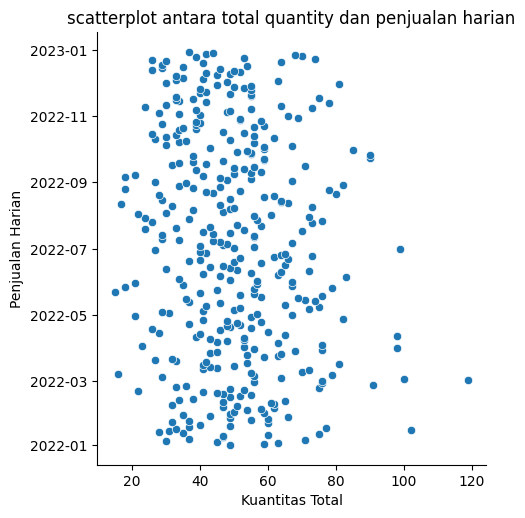

In [65]:
plt.figure(figsize=(12,5))
sns.pairplot(df,x_vars=['Qty'],y_vars=['Date'],height= 5,kind='scatter')
plt.xlabel('Kuantitas Total')
plt.ylabel('Penjualan Harian')
plt.title('scatterplot antara total quantity dan penjualan harian')
plt.show()


In [66]:
df.dropna(subset='Qty',inplace=True)

In [67]:
x=df['Qty']
x.head

<bound method NDFrame.head of 0      49
1      59
2      63
3      45
4      30
       ..
360    70
361    68
362    42
363    44
364    37
Name: Qty, Length: 365, dtype: int64>

In [69]:
y = df['Date']
y.head

<bound method NDFrame.head of 0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
360   2022-12-27
361   2022-12-28
362   2022-12-29
363   2022-12-30
364   2022-12-31
Name: Date, Length: 365, dtype: datetime64[ns]>

In [70]:
from sklearn.model_selection import train_test_split

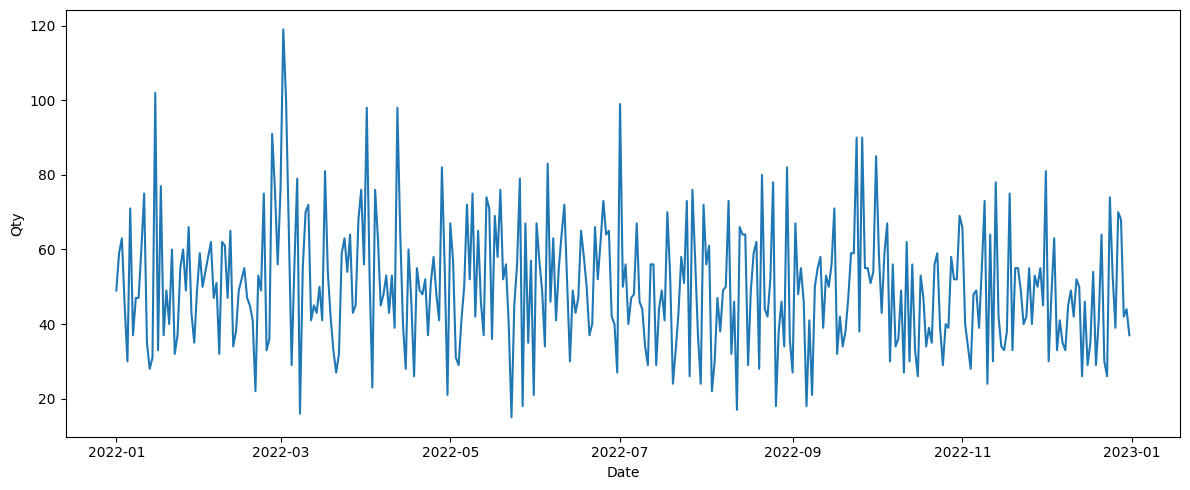

In [108]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x = 'Date', y = 'Qty', data = df)
plt.tight_layout()

In [113]:
df

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


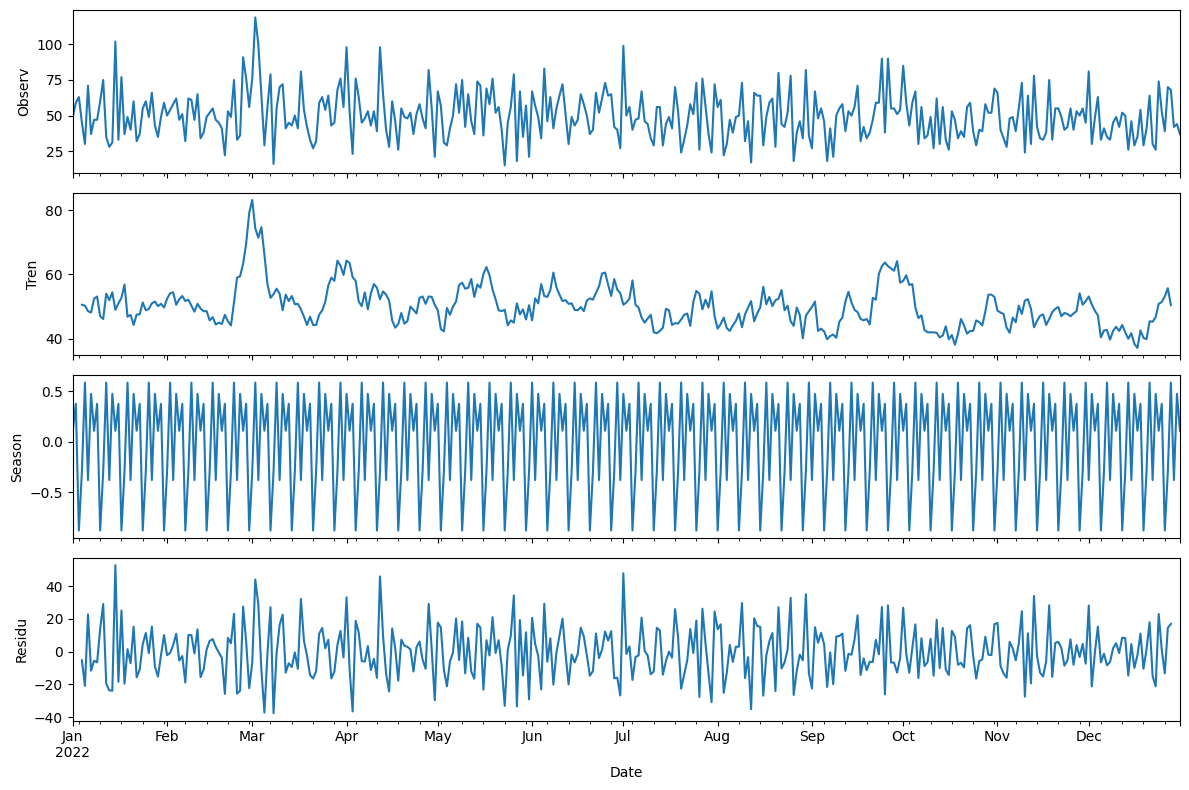

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
regression = seasonal_decompose(df)

# Plot Result
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (12, 8), sharex = True)
regression.observed.plot(ax = ax1)
ax1.set_ylabel('Observ')
regression.trend.plot(ax = ax2)
ax2.set_ylabel('Tren')
regression.seasonal.plot(ax = ax3)
ax3.set_ylabel('Season')
regression.resid.plot(ax = ax4)
ax4.set_ylabel('Residu')

plt.tight_layout()

In [128]:
train_dataset = int(len(df) * 0.9)
train_data, test_data = df.iloc[:train_dataset], df.iloc[train_dataset:]

In [129]:
train_data

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-11-20,55
2022-11-21,55
2022-11-22,49


In [130]:
test_data

,Qty
Date,
2022-11-25,55
2022-11-26,40
2022-11-27,53
2022-11-28,50
2022-11-29,55
2022-11-30,45
2022-12-01,81
2022-12-02,30
2022-12-03,48


In [160]:
def rmse(y_train, y_pre):
  print(f'RMSE Value: {mean_squared_error(y_train, y_pre)**0.5}')
def rsquare(y_train, y_pre):
  print(f'R-squared Value: {r2_score(y_train, y_pre)}')
def eval(y_train, y_pre):
  rmse(y_train, y_pre)
  rsquare(y_train, y_pre)
  print(f'MAE Value: {mean_absolute_error(y_train, y_pre)}')

In [161]:
order = (0,0,0)
seasonal_order = (0, 1, 1, 6)
model = sm.tsa.SARIMAX(train_data['Qty'], order = order, seasonal_order = seasonal_order)
fit_qty = model.fit()
print(fit_qty.summary())


                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Observations:                  328
Model:             SARIMAX(0, 1, [1], 6)   Log Likelihood               -1381.985
Date:                   Fri, 01 Sep 2023   AIC                           2767.970
Time:                           03:00:16   BIC                           2775.519
Sample:                       01-01-2022   HQIC                          2770.984
                            - 11-24-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6       -0.9447      0.030    -31.001      0.000      -1.004      -0.885
sigma2       300.1890     21.306     14.089      0.000     258.430     341.948
Ljung-Box (L1) (Q):         

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [162]:
model = sm.tsa.SARIMAX(df['Qty'], order = (0, 0, 0), seasonal_order = (1, 1, 0, 6))
fit = model.fit()
print(fit.summary())

                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observations:                  365
Model:             SARIMAX(1, 1, 0, 6)   Log Likelihood               -1584.410
Date:                 Fri, 01 Sep 2023   AIC                           3172.820
Time:                         03:00:19   BIC                           3180.587
Sample:                     01-01-2022   HQIC                          3175.908
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.4922      0.041    -11.896      0.000      -0.573      -0.411
sigma2       397.1422     25.762     15.416      0.000     346.650     447.634
Ljung-Box (L1) (Q):                   0.04  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [163]:
forecast_length = 31
result = fit.get_forecast(forecast_length)
result_arima = result.conf_int()
result_arima['forecasted Qty'] = fit.predict(start = result_arima.index[0],
                                                      end = result_arima.index[-1])
result_arima['Date'] = pd.date_range(start = '2023-01-01', end = '2023-01-31')
result_arima.set_index('Date', inplace = True)
result_arima.head()

,lower Qty,upper Qty,forecasted Qty
Date,,,
2023-01-01,0.925448,79.043450,39.984449
2023-01-02,27.987652,106.105654,67.046653
2023-01-03,10.236466,88.354468,49.295467
2023-01-04,-4.934594,73.183408,34.124407
2023-01-05,19.707735,97.825737,58.766736


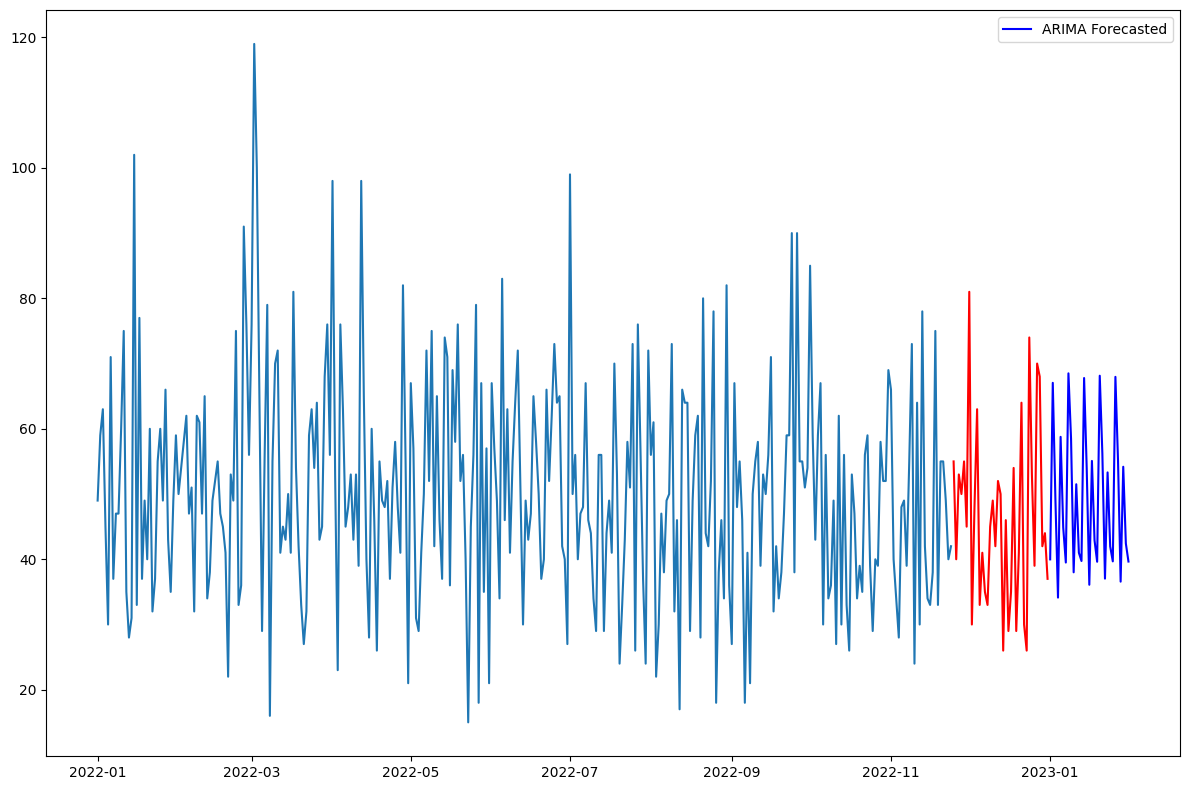

In [166]:
plt.figure(figsize = (12,8))
plt.plot(train_data['Qty'])
plt.plot(test_data['Qty'], color = 'red')
plt.plot(result_arima['forecasted Qty'], color = 'b', label = 'ARIMA Forecasted')
plt.legend()

plt.tight_layout()


In [171]:
df= df_merge.groupby('CustomerID').agg({'TransactionID':'count',
                                                 'Qty':'sum',
                                                 'TotalAmount':'sum'}).reset_index()
df.head()


,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [172]:
df.isnull().sum()

CustomerID       0
TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

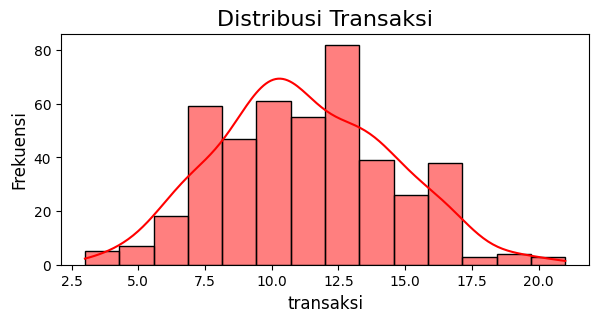

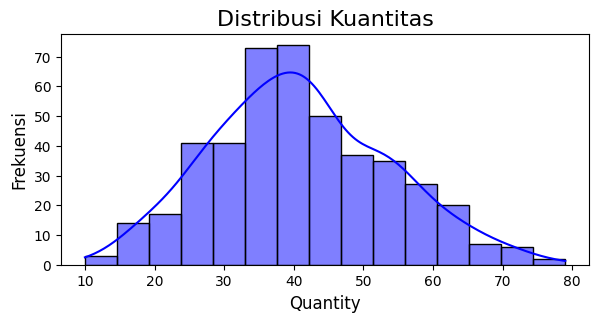

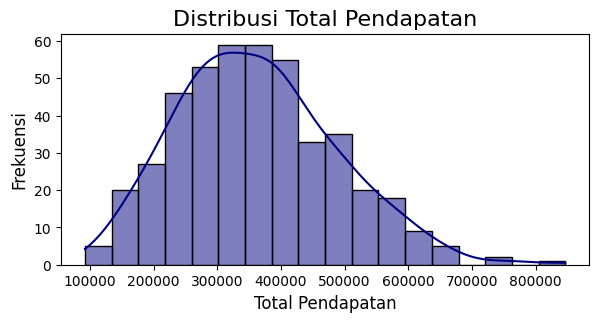

In [185]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(df['TransactionID'], color ='r', kde = True)
plt.title('Distribusi Transaksi', fontsize = 16)
plt.xlabel('transaksi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(df['Qty'], color ='b', kde = True)
plt.title('Distribusi Kuantitas', fontsize = 16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(df['TotalAmount'], color ='navy', kde = True)
plt.title('Distribusi Total Pendapatan', fontsize = 16)
plt.xlabel('Total Pendapatan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.show()

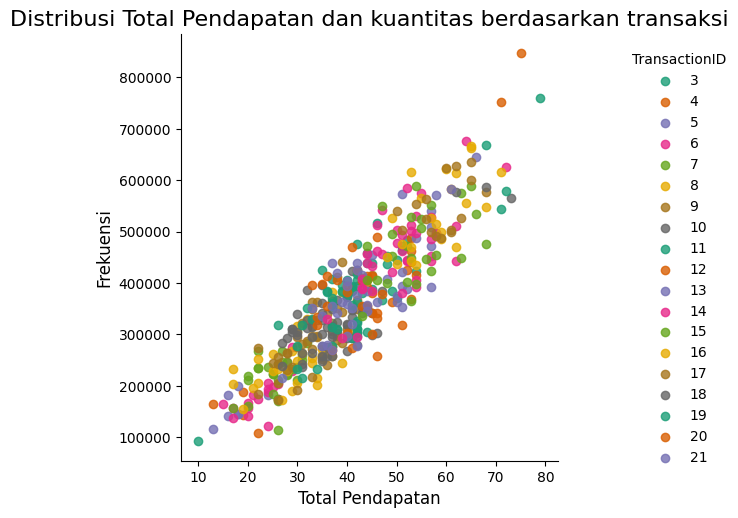

In [200]:
sns.lmplot(x='Qty',y='TotalAmount',data=df, fit_reg=False, hue='TransactionID', height=5, palette='Dark2')
plt.title('Distribusi Total Pendapatan dan kuantitas berdasarkan transaksi', fontsize = 16)
plt.xlabel('Total Pendapatan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

In [213]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans
x1 = df[['Qty','TotalAmount']]
wcss = []
for n in range (1,11):
  model1 =KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state=100)
  model1.fit(x1)
  wcss.append(model1.inertia_)
print(wcss)

[6928031854905.469, 2434755239161.558, 1233416628637.202, 776512015459.3008, 504081359168.6173, 382561649380.6708, 277934831850.9972, 212853439355.07407, 171266009033.98712, 137780279242.6316]


Text(0, 0.5, 'Wcss')

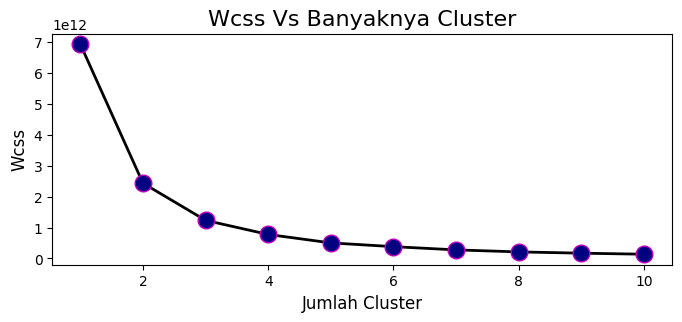

In [224]:
plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)), wcss, color='black', marker='o', linewidth=2, markersize=12, markerfacecolor='navy', markeredgecolor='m')
plt.title('Wcss Vs Banyaknya Cluster', fontsize = 16)
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('Wcss', fontsize=12)

In [226]:
#membuat clustering yang opsional
model1 =KMeans(n_clusters=3, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(x1)
label1=model1.labels_
centroids1=model1.cluster_centers_


Text(0, 0.5, 'Transaksi')

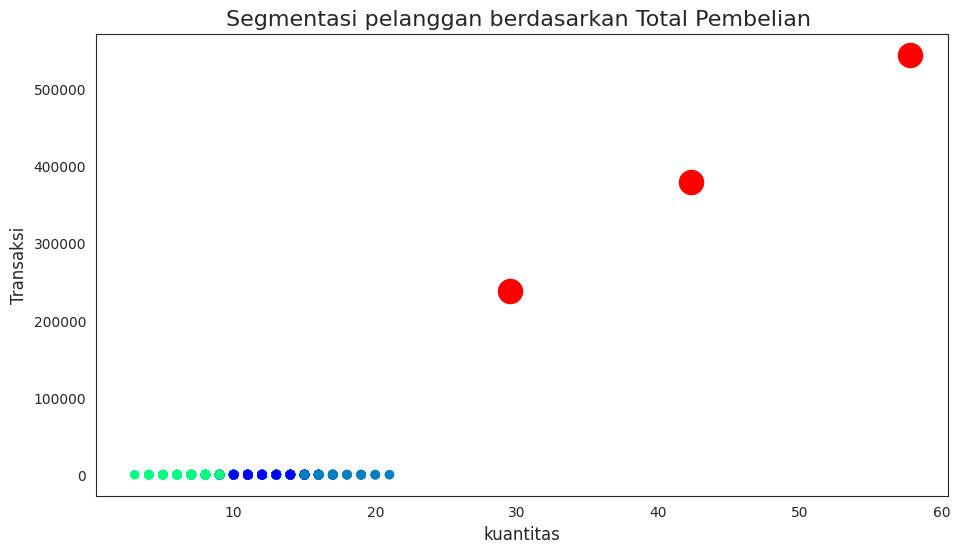

In [233]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['TransactionID'], y =df['Qty'], c=label1, cmap='winter')
plt.scatter(x= centroids1[:,0],y=centroids1[:, 1], s=300,c='r' )
plt.title('Segmentasi pelanggan berdasarkan Total Pembelian ', fontsize = 16)
plt.xlabel('kuantitas', fontsize=12)
plt.ylabel('Transaksi', fontsize=12)